# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# phase 1

## Load data

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data basic info 

In [4]:
print(df.shape)

(1000, 8)


In [5]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
print(df.duplicated().value_counts())

False    1000
Name: count, dtype: int64


`no duplicated Recodes`

In [8]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

`no null value`

In [10]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## phase 1 outputs
**Let's talk about the columns:**
1. gender : gender of student
2. race/ethnicity : the groups of the student
3. parental level of education : education level
4. lunch : is the food level is (free or standard)
5. test preparation course : is the student finish the course of the test or not before the test
6. math score : the math exam score 
7. reading score : the reading exam score 
8. writing  score : the writing exam score 

the columns `1 -> 5` is categorical columns, `6 -> 8` is num columns (the score of each student in subjects)  

# Phase 2 : Data Cleaning

## Rename columns

In [11]:
print(df.columns) 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [12]:
df_renamed = df.rename(columns= {'race/ethnicity': 'group' ,\
    'parental level of education' : 'parent_education' ,\
        'test preparation course' : 'course' ,\
            'math score': 'math_score' , \
            'reading score': 'reading_score',\
                'writing score' : 'writing_score'})

In [13]:
print(df_renamed.columns) 

Index(['gender', 'group', 'parent_education', 'lunch', 'course', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')


In [14]:
clean_df = df_renamed

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   group             1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   course            1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## phase 2 outputs 

`clean_df` : this DF is clean and rename some columns to make more friendly and sure the num columns have int type.  

# phase 3 : Descriptive Statistics

In [16]:
clean_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
print (f" math score median = {clean_df['math_score'].median()}")
print (f" reading score median = {clean_df['reading_score'].median()}")
print (f" writing score median = {clean_df['writing_score'].median()}")

 math score median = 66.0
 reading score median = 70.0
 writing score median = 69.0


In [18]:
grouped_df = clean_df.groupby(by= 'gender')

In [19]:
result = grouped_df[['math_score','reading_score','writing_score']].agg(['mean' , 'median' , 'std' ,'min' , 'max']).round(3).T

# Flatten the multi-index row labels
result.index = pd.Index([f"{col[0].replace('-score', '__')}_{col[1]}" for col in result.index])

display(result)

gender,female,male
math_score_mean,63.633,68.728
math_score_median,65.000,69.000
math_score_std,15.491,14.356
math_score_min,0.000,27.000
math_score_max,100.000,100.000
reading_score_mean,72.608,65.473
reading_score_median,73.000,66.000
reading_score_std,14.378,13.932
reading_score_min,17.000,23.000
reading_score_max,100.000,100.000


`Here we see the female has better mean in tow subject reading and writing but lose in the math for males `

In [20]:
clean_df.parent_education.value_counts()

parent_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

`Here we see the most common parent education is 'some college'`

## phase 3 : output 

`nothing now`

# phase 4 : Visual Explorations

## todo: TEST Visual 

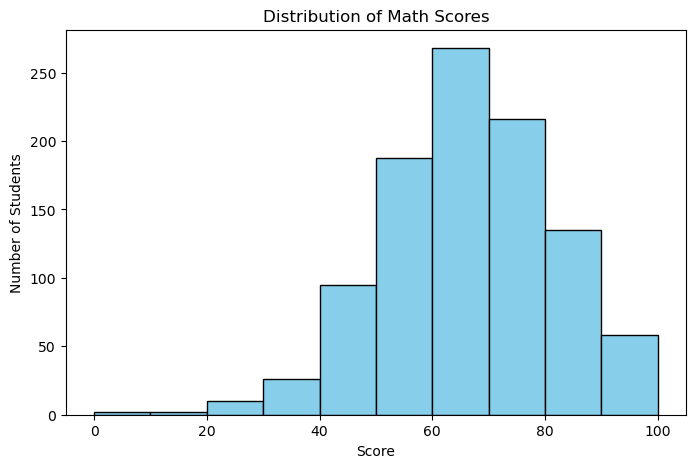

In [41]:
plt.figure(figsize=(8,5))  # sets the figure size
plt.hist(clean_df['math_score'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Math Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()

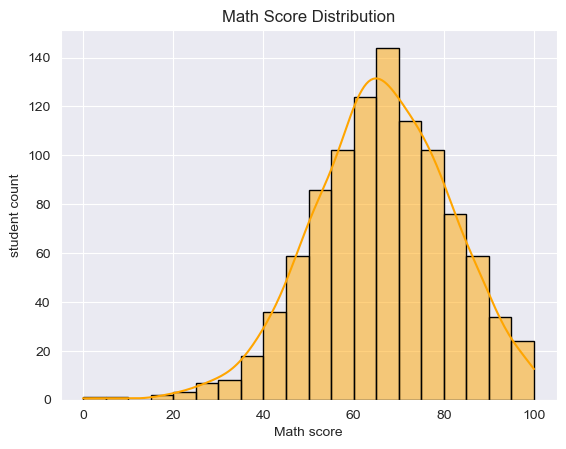

In [107]:
sns.histplot(clean_df['math_score'], bins=20, kde=True, color='orange',edgecolor='black')
sns.set_style("darkgrid")  # or: "darkgrid", "white", "ticks"

plt.title("Math Score Distribution")
plt.xlabel("Math score")
plt.ylabel("student count")
plt.show()

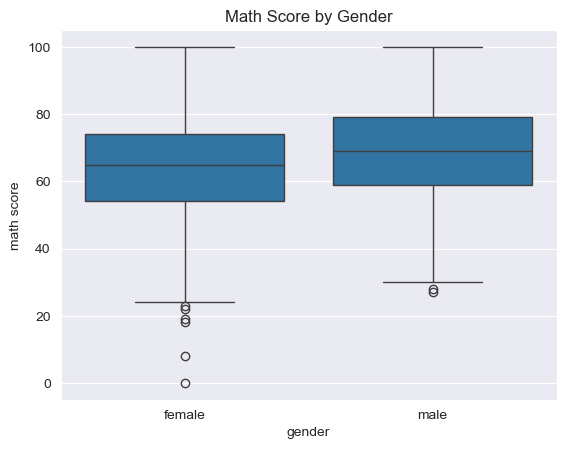

In [62]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score by Gender")
plt.show()

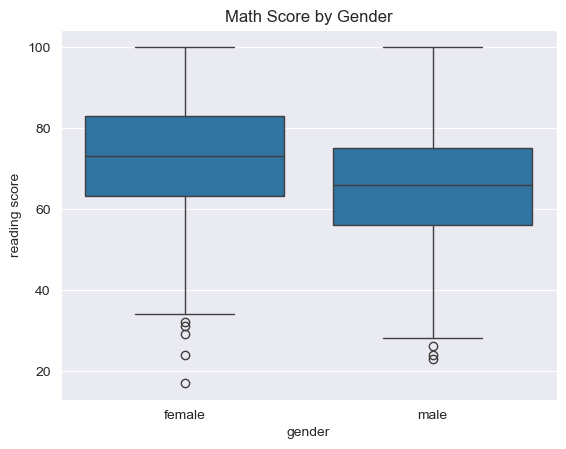

In [63]:
sns.boxplot(x='gender', y='reading score', data=df)
plt.title("Math Score by Gender")
plt.show()

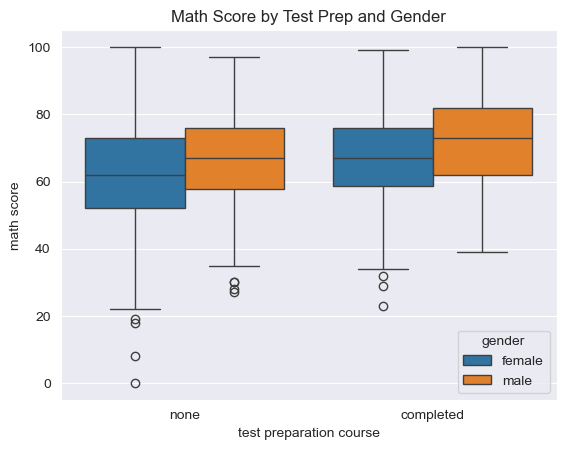

In [121]:
sns.boxplot(x='test preparation course', y='math score', hue='gender', data=df)
plt.title("Math Score by Test Prep and Gender")
plt.show()

In [69]:
print(clean_df.columns)

Index(['gender', 'group', 'parent_education', 'lunch', 'course', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')


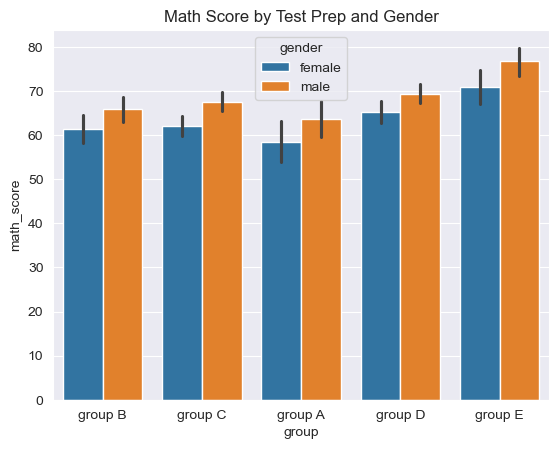

In [73]:
sns.barplot(x='group', y='math_score' , hue= "gender", data=clean_df)
plt.title("Math Score by Test Prep and Gender")
plt.show()

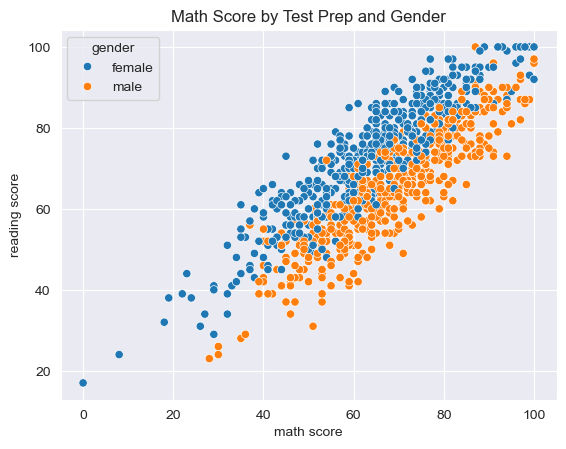

In [75]:
sns.scatterplot(x='math score', y='reading score' , hue= 'gender', data=df)
plt.title("Math Score by Test Prep and Gender")
plt.show()

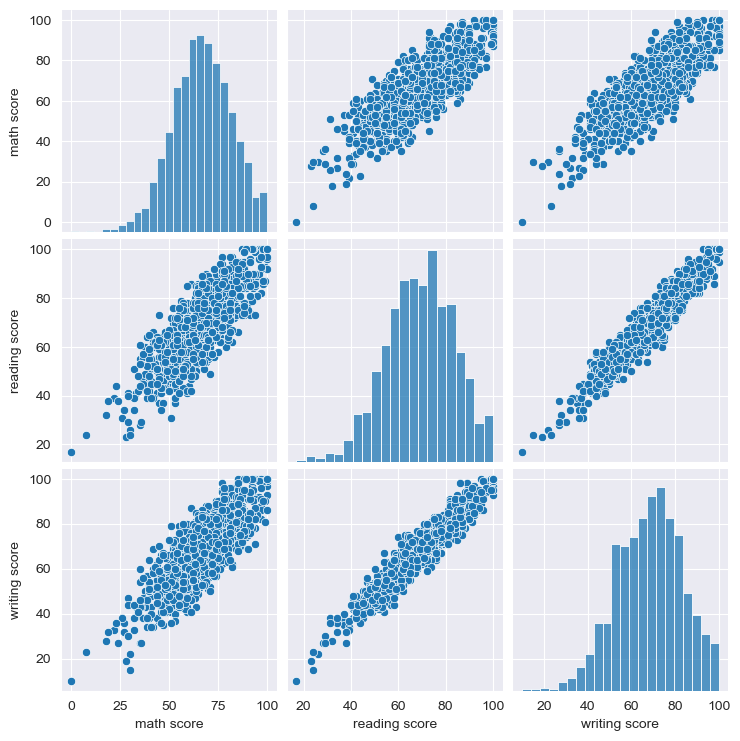

In [86]:
sns.pairplot(df[['math score','reading score','writing score']])
# plt.title("Math Score by Test Prep and Gender")
plt.show()

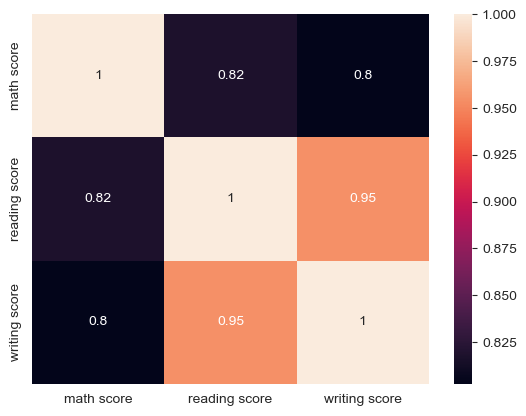

In [81]:
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True)
plt.show()

## start to see the distribution for each subject  

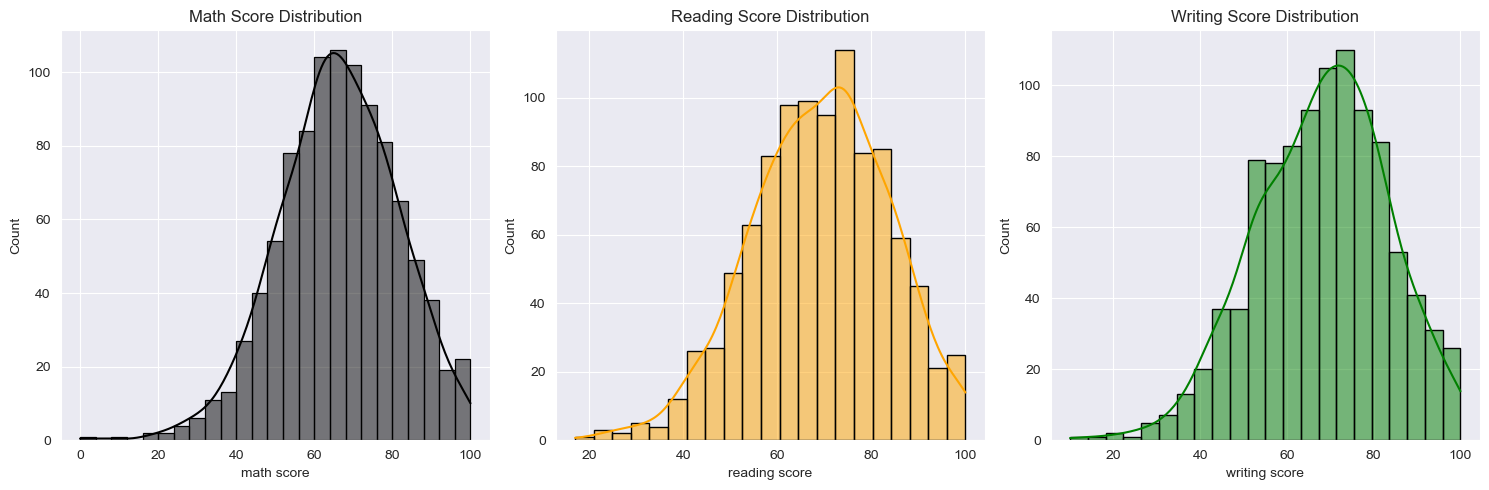

In [ ]:
plt.figure(figsize=(15, 5))   # one large canvas (width=15, height=5)

# 1st plot (row 1, column 3, plot 1)
plt.subplot(1, 3, 1)
sns.histplot(df['math score'] , kde=True, color='skyblue' ,edgecolor='black')
plt.title('Math Score Distribution')

# 2nd plot (row 1, column 3, plot 2)
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='orange',edgecolor='black')
plt.title('Reading Score Distribution')

# 3rd plot (row 1, column 3, plot 3)
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='green',edgecolor='black')
plt.title('Writing Score Distribution')

plt.tight_layout()   # avoids overlapping titles
plt.show()

- there no outliers values 
- and they are same in the distribution  

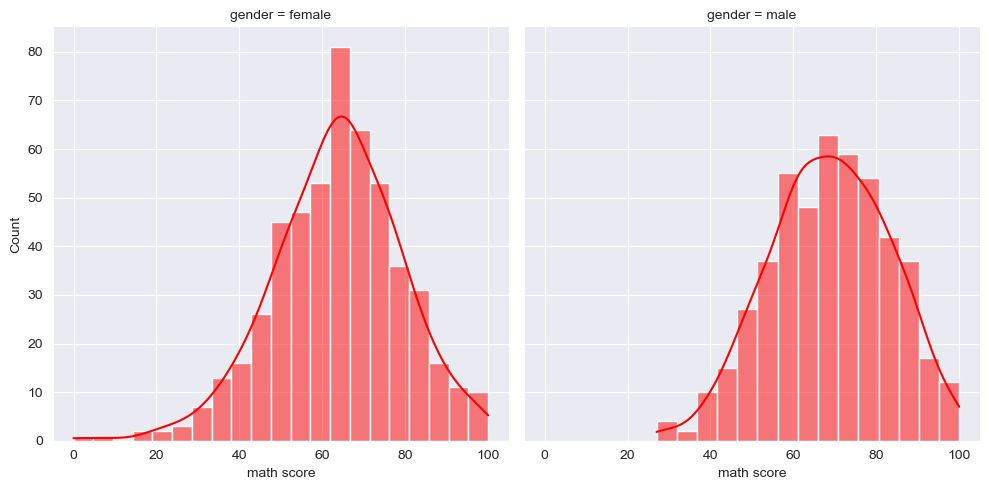

In [120]:
# plt.figure(figsize=(80,5))  # sets the figure size
g = sns.FacetGrid(df, col="gender", height= 5)
g.map(sns.histplot, "math score", kde=True , color= 'red')
plt.show()

## let's now see the score vs gender is there any correlation